# Module 6 - Classification with Neural Networks - Perceptron
****

# Perceptron (Neuron)

A neuron, the fundamental unit of the nervous system, transmits information throughout the body. It consists of a cell body (housing the nucleus and metabolic functions), dendrites (receiving signals), and an axon (sending signals).

![Neuron](../Graphics/neuron.png)

The perceptron is a type of artificial neuron that is used to classify input data into one of two possible outputs. It is a fundamental building block of neural networks and can be used for a variety of tasks, including image recognition, natural language processing, and more.

Invented in 1957 by Frank Rosenblatt at the Cornell Aeronautical Laboratory, a perceptron is
the simplest neural network possible: a computational model of a single neuron. A
perceptron consists of one or more inputs, a processor, and a single output.

![Perceptron](../Graphics/perceptron.png)

A perceptron follows the “feed-forward” model, meaning inputs are sent into the neuron,
are processed, and result in an output. In the diagram above, this means the network (one
neuron) reads from left to right: inputs come in, output goes out.



# Perceptron Learning Algorithm

Let's feed-forward through the steps of the perceptron learning algorithm. 

1. Receive Inputs
2. Weight inputs
3. Sum inputs
4. Generate Outputs

Say we have a perceptron with two inputs—let’s call them x1 and x2.

### Step 1:

Input 0: x1 = 12<br>
Input 1: x2 = 4

### Step 2:

Each input that is sent into the neuron must first be weighted, i.e. multiplied by some value
(often a number between -1 and 1). When creating a perceptron, we’ll typically begin by
assigning random weights. Here, let’s give the inputs the following weights:<p>
Weight 0: 0.5<br>
Weight 1: -1<p>
We take each input and multiply it by its weight.<p>
Input 0 * Weight 0 ⇒ 12 * 0.5 = 6<br>
Input 1 * Weight 1 ⇒ 4 * -1 = -4

### Step 3:
The weighted inputs are then summed.<p>
Sum = 6 + -4 = 2

### Step 4:
The output of a perceptron is generated by passing that sum through an activation function. In
the case of a simple binary output, the activation function is what tells the perceptron whether
to “fire” or not. You can envision an LED connected to the output signal: if it fires, the light
goes on; if not, it stays off.<p>
Activation functions can be complex and difficult to understand. If you start reading artificial intelligence textbooks looking for more info about activation functions, you may soon find
yourself reaching for a calculus textbook. However, with our simple perceptron,
we’re going to do something really easy. Let’s make the activation function the sign of the
sum. In other words, if the sum is a positive number, the output is 1; if it is negative, the output
is -1.<p>
Output = sign(sum) ⇒ sign(2) ⇒ +1<p>

The Perceptron Algorithm:<p>
1. For every input, multiply that input by its weight.
2. Sum all of the weighted inputs.
3. Compute the output of the perceptron based on that sum passed through an
activation function (the sign of the sum).

### Let's build it out in code: 

In [25]:
# Let's create two arrays with our inputs and weights.
import numpy as np

inputs = np.array([12,4], dtype=np.float32)
weights = np.array([0.5,-1], dtype=np.float32)


In [26]:
#“For every input” implies a loop that multiplies each input by its corresponding weight.
#Since we need the sum, we can add up the results in that very loop.
weighted_sum = 0
for i in range(len(inputs)):
    weighted_sum += inputs[i] * weights[i]


In [27]:
# The activation function.  If the weighted sum is positive fire.
def activate(sum):
    if sum > 0:
        return 1
    else:
        return -1
output = activate(weighted_sum)
    
print(output)

1


### Simple Pattern Recognition Using a Perceptron

Now that we understand the computational process of a perceptron, we can look at an
example of one in action. We stated that neural networks are often used for pattern
recognition applications, such as facial recognition. Even simple perceptrons can
demonstrate the basics of classification, as in the following example.<p>

Consider a line in two-dimensional space. Points in that space can be classified as living on either one side of the line or the other. While this is a somewhat silly example (since there is clearly no need for a neural network; we can determine on which side a point lies with some simple algebra), it shows how a perceptron can be trained to recognize points on one side versus another.
<p>
2D space with points on either side of a line:

![2D Space](../Graphics/2D_space.png)

The perceptron itself can be diagrammed as follows:<p>
![Perceptron](../Graphics/perceptron_weights.png)

We can see how there are two inputs (x and y), a weight for each input (weightx and weighty),
as well as a processing neuron that generates the output. There is a pretty significant problem here, however. Let’s consider the point (0,0). What if we send this point into the perceptron as its input: x = 0 and y = 0? What will the sum of its weighted inputs be? No matter what the weights are, the sum will always be 0! But this can’t be right—after all, the point (0,0) could certainly be above or below various lines in our two dimensional world.<p>

To avoid this dilemma, our perceptron will require a third input, typically referred to as a bias
input. A <b>bias</b> input always has the value of 1 and is also weighted. Here is our perceptron with the addition of the bias:

![Perceptron with Bias](../Graphics/perceptron_bias.png)

Let’s go back to the point (0,0). Here are our inputs:<p>
0 * weight for x = 0<br>
0 * weight for y = 0<br>
1 * weight for bias = weight for bias<p>
The output is the sum of the above three values, 0 plus 0 plus the bias’s weight. Therefore, the bias, on its own, answers the question as to where (0,0) is in relation to the line. If the bias’s weight is positive, (0,0) is above the line; negative, it is below. It “biases” the perceptron’s understanding of the line’s position relative to (0,0).

### Let's build out our perceptron in code:


In [28]:
# A class is a template for creating objects. It defines a set of attributes and methods that the objects will have.
# We’re now ready to assemble the code for a Perceptron class. The only data the perceptron needs to track are the 
# input weights, and we could use an array of floats to store these.
import numpy as np

class Perceptron:

    # The constructor could receive an argument indicating the number of inputs 
    # (in this case three: x, y, and a bias) and size the array accordingly.
    def __init__ (self, n):
        self.weights = np.random.uniform(-1,1,size=n)
    
    # A perceptron needs to be able to receive inputs and generate an output. We can package
    # these requirements into a function called feedforward(). In this example, we’ll have the
    # perceptron receive its inputs as an array (which should be the same length as the array of
    # weights) and return the output as an integer.
    def feedforward(self, inputs):
        sum = 0
        for i in range(len(self.weights)):
            sum += inputs[i] * self.weights[i]
        return self.activate(sum)
  
    # Let's copy our activation function from above
    def activate(self, sum):
        if sum > 0:
            return 1
        else:
            return -1


Presumably, we could now create a Perceptron object and ask it to make a guess for any
given point.

![Perceptron Guess](../Graphics/perceptron_guess.png)


In [29]:


# Let's create the perceptron object
perceptron = Perceptron(3)

# The input is 3 values: x,y and bias.
point = np.array([50,-12,1], dtype=np.float32)

# Let's get the answer
result = perceptron.feedforward(point)

print(result)


-1


Did the perceptron get it right? At this point, the perceptron has no better than a 50/50
chance of arriving at the right answer. Remember, when we created it, we gave each weight a
random value. A neural network isn’t magic. It’s not going to be able to guess anything
correctly unless we teach it how to!

### Training a Perceptron

To train a neural network to answer correctly, we’re going to employ the method of
supervised learning.<p>

With this method, the network is provided with inputs for which there is a known answer. This way the network can find out if it has made a correct guess. If it’s incorrect, the network can learn from its mistake and adjust its weights. The process is as follows:
1. Provide the perceptron with inputs for which there is a known answer.
2. Ask the perceptron to guess an answer.
3. Compute the error. (Did it get the answer right or wrong?)
4. Adjust all the weights according to the error.
5. Return to Step 1 and repeat!

Steps 1 through 4 can be packaged into a function (or method). Before we can write the entire function,
however, we need to examine Steps 3 and 4 in more detail. How do we define the
perceptron’s error? And how should we adjust the weights according to this error?
The perceptron’s error can be defined as the difference between the desired answer and its
guess.<p>
<b>ERROR = DESIRED OUTPUT - GUESS OUTPUT</b>

In the case of the perceptron, the output has only two possible values: +1 or -1. This means
there are only three possible errors.
If the perceptron guesses the correct answer, then the guess equals the desired output and
the error is 0. If the correct answer is -1 and we’ve guessed +1, then the error is -2. If the
correct answer is +1 and we’ve guessed -1, then the error is +2.

| Desired | Guess | Error |
|---------|-------|-------|
| -1      | -1    | 0     |
| -1      | +1    | -2    |
| +1      | -1    | +2    |
| +1      | +1    | 0     |

The error is the determining factor in how the perceptron’s weights should be adjusted. For
any given weight, what we are looking to calculate is the change in weight, often called
Δweight (or “delta” weight, delta being the Greek letter Δ).<p>
<b>NEW WEIGHT = WEIGHT + ΔWEIGHT</b><p>
Δweight is calculated as the error multiplied by the input.<p>
<b>ΔWEIGHT = ERROR * INPUT</b><p>
Therefore:<p>
<b>NEW WEIGHT = WEIGHT + ERROR * INPUT</b><p>

Let's put together our full training pipeline for our perceptron but first we need one more variable. We need to define a learning rate. The learning rate is a number between 0 and 1 that indicates how much the weights should be adjusted at each step. A learning rate of 0.1 would increase the weights by 10% each time. A learning rate of 0.01 would increase the weights by 1% each time. A learning rate of 1 would increase the weights by 100% each time, which would be a bit crazy. We want to find a balance between 0 and 1 that will allow the perceptron to learn without adjusting the weights too much or too little.<p>
<b>NEW WEIGHT = WEIGHT + ERROR * INPUT * LEARNING RATE</b><p>

### Let's build out our training pipeline in code:


In [30]:
# A class is a template for creating objects. It defines a set of attributes and methods that the objects will have.
# We’re now ready to assemble the code for a Perceptron class. The only data the perceptron needs to track are the 
# input weights, and we could use an array of floats to store these.
import numpy as np

class Perceptron:

    # The constructor could receive an argument indicating the number of inputs 
    # (in this case three: x, y, and a bias) and size the array accordingly.
    def __init__ (self, n):
        self.weights = np.random.uniform(-1,1,size=n)
        # Learning rate
        self.c = 0.01
    
    # A perceptron needs to be able to receive inputs and generate an output. We can package
    # these requirements into a function called feedforward(). In this example, we’ll have the
    # perceptron receive its inputs as an array (which should be the same length as the array of
    # weights) and return the output as an integer.
    def feedforward(self, inputs):
        sum = 0
        for i in range(len(self.weights)):
            sum += inputs[i] * self.weights[i]
        return self.activate(sum)
  
    # Let's copy our activation function from above
    def activate(self, sum):
        if sum > 0:
            return 1
        else:
            return -1

    def train(self, inputs, desired):
        #Guess according to inputs
        guess = self.feedforward(inputs)
        #Compute the error
        error = desired - guess
        #Adjust the weights
        for i in range(len(self.weights)):
            self.weights[i] += self.c * error * inputs[i]



To train the perceptron, we need a set of inputs with a known answer. We could package
this up in a class like so:

In [31]:
class Trainer:
    def __init__(self,x, y, answer):
        self.inputs = [x,y,1.0]
        self.answer = answer

Now the question becomes, how do we pick a point and know whether it is above or below a line? Let’s start with the formula for a line, where y is calculated as a function of x:<p>
<b>y = f(x)</b><p>
In generic terms, a line can be described as:<p>
<b>y = ax + b</b><p>
In the equation y = ax + b, y is the dependent variable, x is the independent variable, a is the slope of the line, and b is the y-intercept. The slope a determines how steep the line is, while the y-intercept b determines where the line crosses the y-axis. This equation is used to describe a straight line in a two-dimensional space.<p>

Here’s a specific example:<p>
<b>y = 2*x + 1</b><p>

![Line](../Graphics/line.png)

In [32]:
#The function f(x) defines a line in the 2D space. It takes an input x and returns the 
# corresponding y value on the line. The line is defined by the equation y = 2*x + 1. 
# This equation is in the slope-intercept form, where 2 is the slope of the line and 1 
# is the y-intercept. The slope of the line determines its steepness, while the 
# y-intercept determines where the line crosses the y-axis. By changing the values of 
# the slope and y-intercept, we can define different lines in the 2D space.

def f(x):
    return 2*x+1


In [33]:
import numpy as np
import matplotlib.pyplot as plt

perceptron = Perceptron(3)
training = []
for i in range(2000):
    x = np.random.uniform(-50,50)
    y = np.random.uniform(-50,50)
    answer = 1
    if y < f(x):
        answer = -1
    training.append(Trainer(x,y,answer))


In [46]:
# Train the perceptron
for n in range(len(training)):
    perceptron.train(training[n].inputs, training[n].answer)

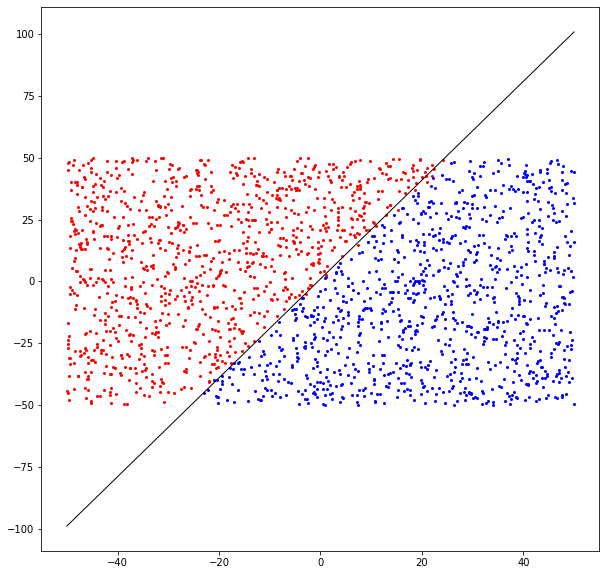

In [47]:
fig = plt.figure(figsize = (10,10))

for i in range(len(training)):
    guess = perceptron.feedforward(training[i].inputs)
    if guess == 1:
        plt.plot(training[i].inputs[0], training[i].inputs[1], 'ro', markersize=2)
    else:
        plt.plot(training[i].inputs[0], training[i].inputs[1], 'bo', markersize=2)

x = np.array([-50,50])
y = f(x)
plt.plot(x,y,'k-', linewidth=1)
plt.show()

Yes, a perceptron can have multiple inputs, but it is still a lonely neuron. The power of
neural networks comes in the networking itself. Perceptrons are, sadly, incredibly limited in
their abilities. If you read an AI textbook, it will say that a perceptron can only solve linearly
separable problems. What’s a linearly separable problem? Let’s take a look at our first
example, which determined whether points were on one side of a line or the other.

![Lineraly](../Graphics/lineraly.png)

We have classic linearly separable data. Graph all of the
possibilities; if you can classify the data with a straight line, then it is linearly separable. On
the right, however, is non-linearly separable data. You can’t draw a straight line to separate
the black dots from the gray ones.

We need more than one perception to solve this problem. We need a network of perceptrons. We need a <b>neural network</b>.

![Neural Network](../Graphics/multi_layered.png)

The above diagram is known as a multi-layered perceptron or neural network, a network of many neurons.
Some are input neurons and receive the inputs, some are part of what’s called a “hidden”
layer (as they are connected to neither the inputs nor the outputs of the network directly),
and then there are the output neurons, from which we read the results.

Training these networks is much more complicated. With the simple perceptron, we could
easily evaluate how to change the weights according to the error. But here there are so
many different connections, each in a different layer of the network. How does one know
how much each neuron or connection contributed to the overall error of the network?

The solution to optimizing weights of a multi-layered network is known as <b>backpropagation.</b>
The output of the network is generated in the same manner as a perceptron. The inputs
multiplied by the weights are summed and fed forward through the network. The difference
here is that they pass through additional layers of neurons before reaching the output.
Training the network (i.e. adjusting the weights) also involves taking the error (desired result - guess). The error, however, must be fed backwards through the network. The final error
ultimately adjusts the weights of all the connections.

### Backpropagation

The basic math of backpropagation involves the chain rule of calculus. The chain rule is a rule for finding the derivative of a composite function. In the context of neural networks, the chain rule is used to calculate the derivative of the loss function with respect to the weights of the network.

The chain rule states that if we have a function f(x) = g(h(x)), where g and h are both differentiable functions, then the derivative of f with respect to x is given by:

df/dx = dg/dh * dh/dx

<b>df/dx</b>: This represents the derivative of the function f with respect to the variable x. In other words, it tells you how much the function f changes as the input variable x changes.

<b>dg/dh</b>: This represents the derivative of the function g with respect to the variable h. It tells you how much the function g changes as its input h changes.

<b>dh/dx</b>: This represents the derivative of the function h with respect to the variable x. It tells you how much the function h changes as its input x changes.

Now, let's understand how the chain rule works:

1. Imagine you have a composite function f(x), which can be expressed as f(x) = g(h(x)). In other words, the output of h(x) is used as the input to g.

2. To find the derivative of f(x) with respect to x, you can't directly differentiate it because it involves two nested functions, g and h.

3. Instead, you use the chain rule, which says that the derivative of f with respect to x is the product of two derivatives: dg/dh (how g changes with respect to h) and dh/dx (how h changes with respect to x).

In the context of neural networks, we can think of the output of the network as a composite function of the inputs and the weights. The output of the network is then fed into a loss function, which measures how well the network is performing. The goal of backpropagation is to calculate the gradient of the loss function with respect to the weights of the network.

To do this, we first calculate the derivative of the loss function with respect to the output of the network. This is done using the chain rule. We then use this derivative to calculate the derivative of the loss function with respect to the weights of the network. This is also done using the chain rule.

The basic math of backpropagation can be summarized as follows:

1. Forward pass: Calculate the output of the network given the inputs and the weights.
2. Calculate the loss function given the output of the network and the desired output.
3. Backward pass: Calculate the derivative of the loss function with respect to the output of the network.
4. Use the chain rule to calculate the derivative of the loss function with respect to the weights of the network.
5. Update the weights of the network using the calculated derivatives and a learning rate.

Now that we have the basics of a neural network, let’s look at how we can use one to solve a more complex problem. Neurons, loss functions, activation functions, and backpropagation are all the same. The only difference is that we have more than one neuron. We have a network of neurons.